# LangChain и проблема документации

Представим, что я являюсь разработчиком и хочу предоставить пользователю возможность интегрировать популярный инструмент в своего LLM-агента. Конечно, мне придётся взаимодействовь с *LangChain*, так как этот фреймворк объединяет наибольшее количество поставщиков API и не имеет аналогов. С какими трудностями я столкнусь?


- **Страница документации LangChain о предложенных интеграциях:** [LangChain Integrations](https://python.langchain.com/docs/integrations/tools/)

Сначала всё выглядит замечательно, и таблицы достаточно информативны для разработчика, чтобы понять условия использования инструмента

<details>

![tool1.png](image/tool1.png)

</details>

Когда дело доходит до отображения всех инструментов, всё начинает ломаться: нужно переходить на страницу каждого инструмента, затем на сайт платформы, предоставляющей API, и часто только после регистрации становится ясно, нужна ли подписка или доступен ли сервис в вашем регионе. И это только начало проблем. Представьте себе объём работы, который разработчику придётся проделать только в самом начале.

![tool2_1.png](image/tool2_1.png)
![tool2_2.png](image/tool2_2.png)

В LangChain есть хороший пример шаблонного кода в [документации](https://python.langchain.com/docs/tutorials/agents): здесь я меняю поставщика API, и меняется только часть имени основной переменной, без необходимости дополнительной обработки в коде. Но, как и всегда, не обойтись без недостатков... По-прежнему нужно проверять доступность в разных регионах, отсутствие подписок и других ограничений.

<details>

![tool3_1.png](image/tool3_1.png)
![tool3_2.png](image/tool3_2.png)

</details>  
  
Более того, на главной странице утверждается, что разработка происходит из блоков. Однако на самом деле работа с LangChain характеризуется низким КПД, так как разработчику нужно отдельно исследовать **каждый** кирпичик.

<details>

* **link:** https://python.langchain.com/docs/introduction/

![tool4.png](image/tool4.png)

</details>

Я не отрицаю, что синтаксис интеграции утилит одинаковый, но 60% случаев — это далеко не шаблонные решения из-за особенностей различных инструментов. Я заметил, что есть отдельный тип интеграции, где необходимо самостоятельно подмешивать полученные данные в агент (например, с инструментом поисковика DuckDuckGO). Это всё можно было бы удобно собрать в таблице: шаблоны, источники ключей, дополнительные строки, информация о подписке и регионах, где сервис не работает. Вместо этого приходится обращаться к сторонним ресурсам, где через какое-то время узнаёшь о работоспособности **только** с проприетарными моделями от OpenAI, а также о том, что на некоторых операционных системах требуется дополнительное программное обеспечение и многое другое.

## Отказ от сторонних источников
* Вот минималистичный и понятный вариант документации инсутрмента на примере AskNews прошу сравнить его с оригинальной [документацией](https://python.langchain.com/docs/integrations/tools/asknews/) от LangChain.
1. Работает на всех OS и требует дополнительного ПО - ✅
2. Полностью бесплатен - ✅
3. Работает во всех регионах - ✅
4. Работает со всеми моделями - ✅

### Инициализация обращения к модели

конечно же с поправкой на... <details> 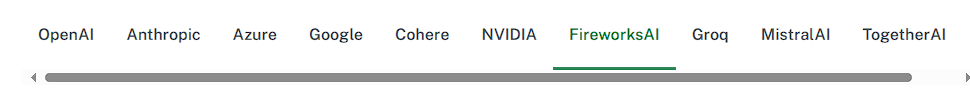 </details> 

In [1]:
import os
os.environ["FIREWORKS_API_KEY"] = "XXXXXXX"

from langchain_fireworks import ChatFireworks

llm = ChatFireworks(
    model="accounts/fireworks/models/llama-v3-70b-instruct",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

### Install

In [ ]:
!pip install -U langchain-community asknews
!pip install -U langchain-openai langchainhub

### Input API
##### Необходимо задать учетные данные API AskNews, которые можно получить в консоли AskNews. (https://my.asknews.app/)

In [4]:
import os
os.environ["ASKNEWS_CLIENT_ID"] = "XXXXXXX"
os.environ["ASKNEWS_CLIENT_SECRET"] = "XXXXXXX"

### Run

#### Вариант с использованием заготовленных системных промтов через LangSmith/hub (https://smith.langchain.com/hub/hwchase17/openai-functions-agent)

In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain_community.tools.asknews import AskNewsSearch

prompt = hub.pull("hwchase17/openai-functions-agent")

asknews_tool = AskNewsSearch()
tools = [asknews_tool]

agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools)
agent_executor.invoke({"input": "tell us about the news in the field of llm"})

#### Вариант с использованием собственного системного промта

In [ ]:
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain_community.tools.asknews import AskNewsSearch
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
  ("system", "your role is a fan of the langchain framework"),
  ("placeholder", "{chat_history}"),
  ("human", "{input}"),
  ("placeholder", "{agent_scratchpad}"),
])

asknews_tool = AskNewsSearch()
tools = [asknews_tool]

agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools)
agent_executor.invoke({"input": "tell us about the news in the field of llm"})

### Additionally
#### Использование инструмента напрямую

In [ ]:
from langchain_community.tools.asknews import AskNewsSearch

tool = AskNewsSearch(max_results=2)
tool.invoke({"query": "the fight against entropy"})

# Бесшовная организация информации
* Теперь разработчику не нужно искать дополнительную информацию на сторонних источниках – остается просто запросить API-ключ у поставщика инструмента. Однако по-прежнему требуется обработать 98 таких страниц. Как можно еще лучше организовать информацию?

| Tool    | Cross-platform | Free | for all models | for all regions |
|:-------:|:--------------:|:----:|:--------------:|:---------------:|
| AskNews | ✅              | ✅    | ✅              | ✅              |
|
|   |   |


| Install                                                                                      | Input API                                                                                                   | Launch with LangSmith/hub                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | Launch with your prompt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | API provider            |
|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------|
| !pip install -U langchain-community asknews<br>!pip install -U langchain-openai langchainhub | import os<br>os.environ["ASKNEWS_CLIENT_ID"] = "XXXXXXX"<br>os.environ["ASKNEWS_CLIENT_SECRET"] = "XXXXXXX" | from langchain import hub<br>from langchain.agents import AgentExecutor, create_openai_functions_agent<br>from langchain_community.tools.asknews import AskNewsSearch<br><br>prompt = hub.pull("hwchase17/openai-functions-agent")<br><br>asknews_tool = AskNewsSearch()<br>tools = [asknews_tool]<br><br>agent = create_openai_functions_agent(llm, tools, prompt)<br>agent_executor = AgentExecutor(agent=agent, tools=tools)<br>agent_executor.invoke({"input": "tell us about the news in the field of llm"}) | from langchain.agents import AgentExecutor, create_openai_functions_agent<br>from langchain_community.tools.asknews import AskNewsSearch<br>from langchain_core.prompts import ChatPromptTemplate<br><br>prompt = ChatPromptTemplate.from_messages([<br>  ("system", "your role is a fan of the langchain framework"),<br>  ("placeholder", "{chat_history}"),<br>  ("human", "{input}"),<br>  ("placeholder", "{agent_scratchpad}"),<br>])<br><br>asknews_tool = AskNewsSearch()<br>tools = [asknews_tool]<br><br>agent = create_openai_functions_agent(llm, tools, prompt)<br>agent_executor = AgentExecutor(agent=agent, tools=tools)<br>agent_executor.invoke({"input": "tell us about the news in the field of llm"}) | https://my.asknews.app/ |
|
|
|


Конечно, оформление должно быть немного другим (перенос строк, подсветка синтаксиса и т.д.), но это максимум, который позволяет Markdown.
Предлагаю расположить таблицы так, чтобы разработчик мог задать фильтры в первой таблице (как выпадающее окно в Excel) и сразу увидеть инструменты, соответствующие его параметрам, во второй.

![Excel-Column-Filter-Example.png](image/Excel-Column-Filter-Example.png)